In [1]:
# import library
import cv2
import matplotlib.pyplot as plt # memvisualisasi data
import numpy as np # membaca angka

# membaca data gambar

In [2]:
img = cv2.imread("20240511_010046.jpg")

# membuat baris dan kolom

In [3]:
img.shape # membuat variabel dalam baris dan kolom dalam shape citra

(1973, 3330, 3)

In [4]:
[baris, kolom] = img.shape[:2]

# konversi dari BGR ke RGB

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# menampilkan gambar yang sudah dikonversi

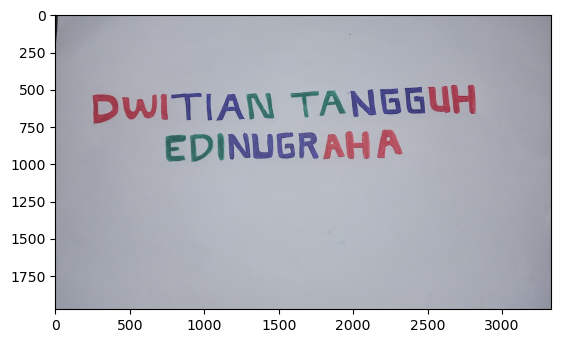

In [6]:
plt.imshow(img)

# melakukan operasi gabungan piksel untuk meningkatkat kecerahan dan kontras

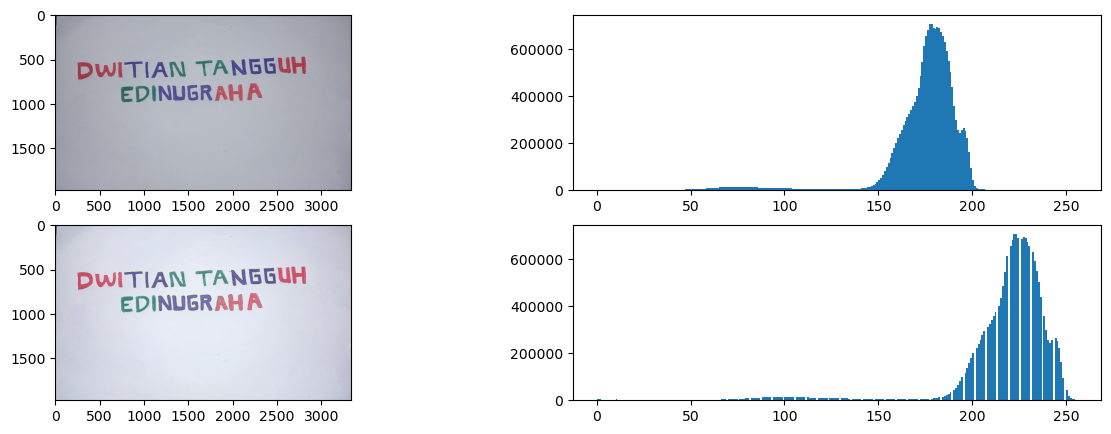

In [7]:
alpa = 1.2
beta = 10

citra_gabungan = np.zeros((baris, kolom, 3))

for x in range (baris) :
    for y in range (kolom) :
        gcx = (img[x, y] * alpa) + beta
        citra_gabungan[x, y] = gcx

citra_gabungan = citra_gabungan.astype(np.uint8)

# menampilkan
fig, axs = plt.subplots(2, 2, figsize = (15, 5))
axs[0, 0].imshow(img)
axs[0, 1].hist(img.ravel(), 256, [0, 256])
axs[1, 0].imshow(citra_gabungan)
axs[1, 1].hist(citra_gabungan.ravel(), 256, [0, 256])
plt.show()

# deteksi warna pada citra

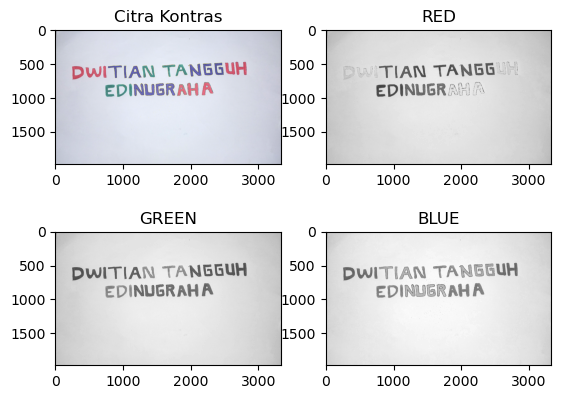

In [8]:
# gambar citra kontras (citra_gabungan)
plt.subplot(2, 2, 1)
plt.imshow(citra_gabungan)
plt.title('Citra Kontras')

# warna merah
plt.subplot(2, 2, 2)
plt.imshow(citra_gabungan[:,:,0], cmap="gray")
plt.title('RED')

# warna hijau
plt.subplot(2, 2, 3)
plt.imshow(citra_gabungan[:,:,1], cmap="gray")
plt.title('GREEN')

# warna biru
plt.subplot(2, 2, 4)
plt.imshow(citra_gabungan[:,:,2], cmap="gray")
plt.title('BLUE')

plt.show()

# menampilkan histogram pada setiap kategori warna citra

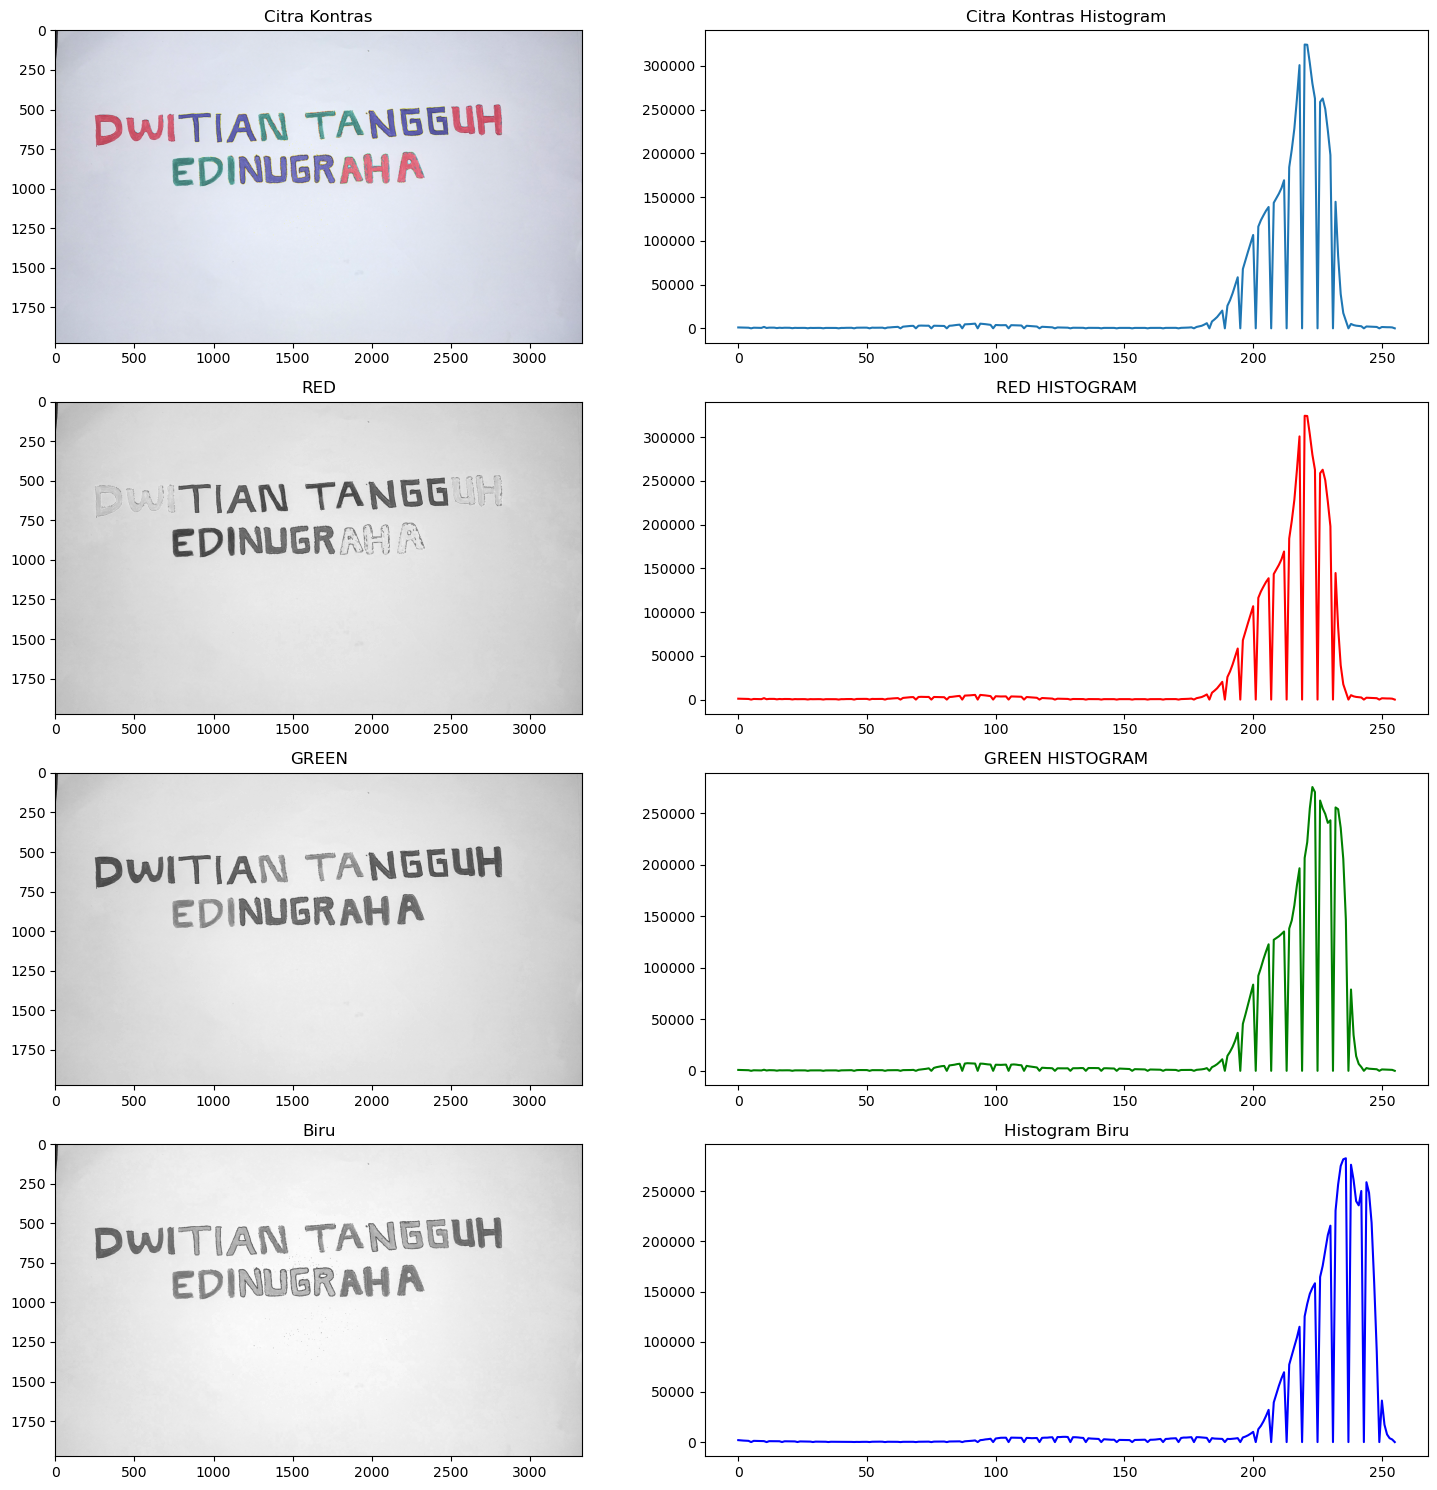

In [9]:
# Menghitung histogram untuk citra_gabungan
hist = cv2.calcHist([citra_gabungan], [0], None, [256], [0, 256])

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

# citra_kontras(citra_gabungan) dan histogramnya
axs[0, 0].imshow(citra_gabungan)
axs[0, 0].set_title('Citra Kontras')
axs[0, 1].plot(hist)
axs[0, 1].set_title('Citra Kontras Histogram')

# RED
red = citra_gabungan[:, :, 0]
redHist = cv2.calcHist([red], [0], None, [256], [0, 256])
axs[1, 0].imshow(red, cmap='gray')
axs[1, 0].set_title('RED')
axs[1, 1].plot(redHist, color='r')
axs[1, 1].set_title('RED HISTOGRAM')

# GREEN
green = citra_gabungan[:, :, 1]
greenHist = cv2.calcHist([green], [0], None, [256], [0, 256])
axs[2, 0].imshow(green, cmap='gray')
axs[2, 0].set_title('GREEN')
axs[2, 1].plot(greenHist, color='g')
axs[2, 1].set_title('GREEN HISTOGRAM')

# BLUE
biru = citra_gabungan[:, :, 2]
hist_biru = cv2.calcHist([biru], [0], None, [256], [0, 256])
axs[3, 0].imshow(biru, cmap='gray')
axs[3, 0].set_title('Biru')
axs[3, 1].plot(hist_biru, color='b')
axs[3, 1].set_title('Histogram Biru')

plt.tight_layout()
plt.show()

# mencari dan mengurutkan nilai ambang batas

In [10]:
# Mencari ambang batas dari histogram
def find_threshold(hist):
    peaks = []
    threshold = []
    
    for i in range(1, len(hist)-1):
        if hist[i] > hist[i-1] and hist[i] > hist[i+1]:
            peaks.append(i)
    
    # Mengambil nilai tengah antara dua puncak histogram sebagai ambang batas
    for i in range(len(peaks) - 1):
        threshold.append((peaks[i] + peaks[i+1]) // 2)
    
    return threshold

# histogram untuk saluran warna merah
red_hist = cv2.calcHist([citra_gabungan[:,:,0]], [0], None, [256], [0, 256])
# histogram untuk saluran warna hijau
green_hist = cv2.calcHist([citra_gabungan[:,:,1]], [0], None, [256], [0, 256])
# histogram untuk saluran warna biru
blue_hist = cv2.calcHist([citra_gabungan[:,:,2]], [0], None, [256], [0, 256])

# Menemukan ambang batas untuk masing-masing saluran warna
red_thresholds = find_threshold(red_hist)
green_thresholds = find_threshold(green_hist)
blue_thresholds = find_threshold(blue_hist)

# Mengurutkan ambang batas dari terkecil hingga terbesar
red_thresholds.sort()
green_thresholds.sort()
blue_thresholds.sort()

# Menampilkan ambang batas
print("Ambang Batas untuk Saluran Warna Merah:", red_thresholds)
print("Ambang Batas untuk Saluran Warna Hijau:", green_thresholds)
print("Ambang Batas untuk Saluran Warna Biru:", blue_thresholds)

Ambang Batas untuk Saluran Warna Merah: [8, 11, 13, 15, 17, 20, 23, 26, 29, 32, 35, 38, 41, 43, 46, 50, 53, 55, 59, 65, 69, 72, 75, 77, 82, 89, 93, 97, 102, 105, 109, 115, 121, 125, 128, 131, 134, 137, 140, 143, 147, 150, 153, 155, 159, 163, 166, 172, 179, 185, 191, 197, 203, 209, 215, 219, 223, 229, 235, 241, 247]
Ambang Batas untuk Saluran Warna Hijau: [8, 11, 14, 17, 20, 24, 27, 29, 33, 37, 41, 45, 48, 50, 54, 57, 60, 64, 71, 77, 83, 87, 91, 97, 102, 105, 109, 115, 121, 125, 127, 130, 135, 138, 141, 145, 151, 157, 163, 168, 171, 174, 179, 185, 191, 197, 203, 209, 215, 220, 224, 228, 231, 235, 241, 247]
Ambang Batas untuk Saluran Warna Biru: [7, 10, 14, 17, 21, 27, 32, 35, 38, 41, 44, 47, 49, 52, 56, 59, 61, 63, 68, 73, 77, 83, 89, 95, 101, 105, 109, 114, 119, 123, 125, 128, 133, 139, 144, 147, 150, 155, 161, 167, 173, 177, 181, 187, 192, 197, 203, 209, 215, 221, 227, 233, 237, 240, 243, 247]


# menampilkan kategori warna pada citra dengan nilai ambang batas 1

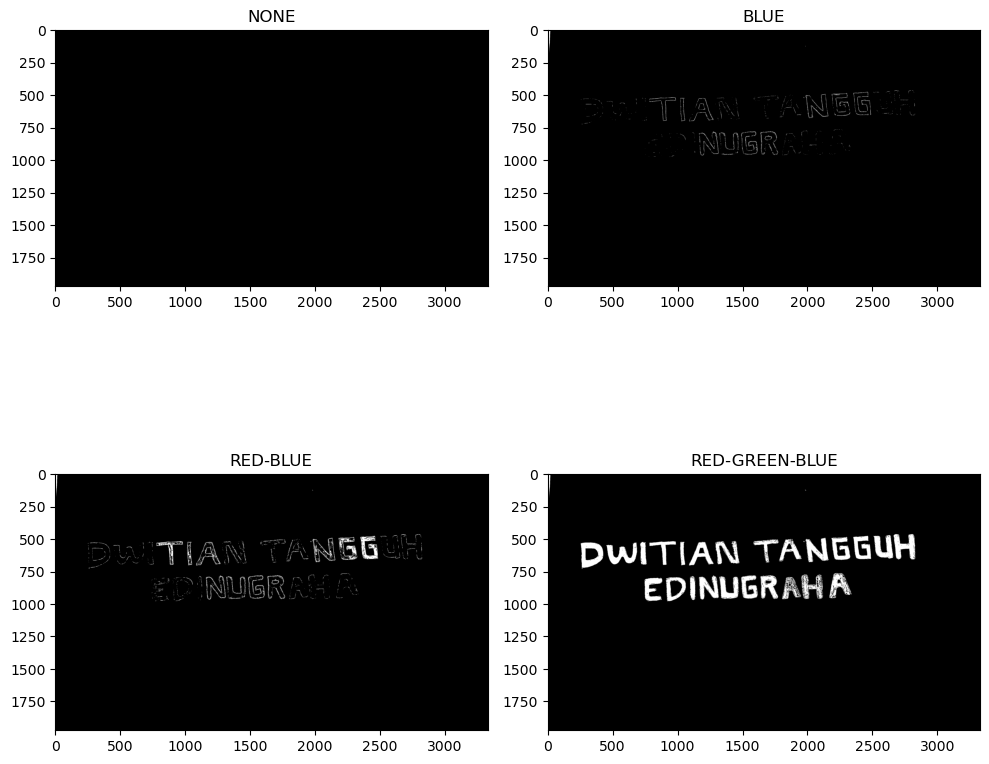

In [11]:
gray = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Ambang batas none
(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)  
axs[0, 0].imshow(binary1, cmap='gray')
axs[0, 0].set_title('NONE')

# Ambang warna blue
(thresh, binary2) = cv2.threshold(gray, 70, 255, cv2.THRESH_BINARY)  
axs[0, 1].imshow(binary2, cmap='binary')
axs[0, 1].set_title('BLUE')

# Ambang warna red-blue
(thresh, binary3) = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
axs[1, 0].imshow(binary3, cmap='binary')
axs[1, 0].set_title('RED-BLUE')

# Ambang warna red-green-blue
(thresh, binary4) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
axs[1, 1].imshow(binary4, cmap='binary')
axs[1, 1].set_title('RED-GREEN-BLUE')

plt.tight_layout()
plt.show()


# menampilkan kategori warna pada citra dengan nilai ambang batas 2

# Konversi citra ke dalam ruang warna HSV

In [12]:
hsv_image = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2HSV)

# mendefinisikan nilai ambang batas setiap warna

In [13]:
# Definisikan rentang warna untuk setiap warna
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([140, 255, 255])

# Gunakan ambang batas untuk warna hijau yang telah Anda temukan
lower_green = np.array([20, 100, 100])
upper_green = np.array([250, 255, 255])

lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# mendeteksi setiap warna

In [14]:
# Deteksi warna merah
mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
mask_red = np.maximum(mask_red1, mask_red2)

# Deteksi warna hijau
mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

# Deteksi warna biru
mask_blue = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Deteksi warna red-green-blue
mask_red_green_blue = np.maximum(np.maximum(mask_red, mask_green), mask_blue)

# menampilkan hasil menggunakan subplots

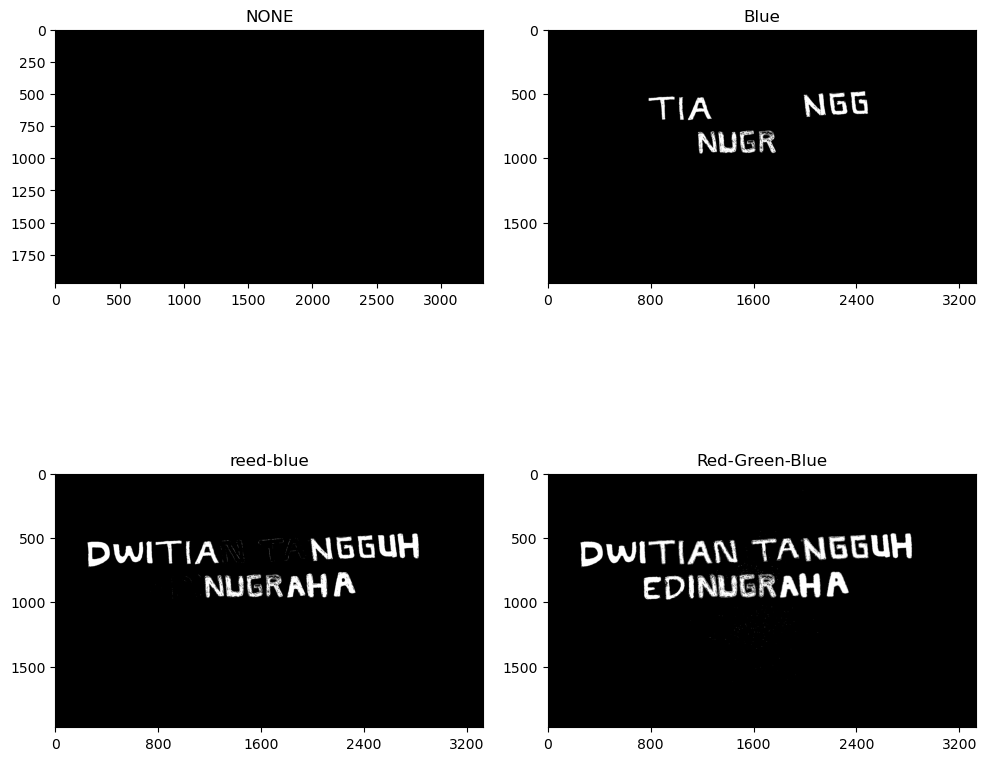

In [15]:
# subplot 1
gray = cv2.cvtColor(citra_gabungan, cv2.COLOR_RGB2GRAY)
fig, axs = plt.subplots (2, 2, figsize=(10,10))

(thresh, binary1) = cv2.threshold(gray, 0, 0, cv2.THRESH_BINARY)
axs[0,0].imshow(binary1, cmap = 'gray')
axs[0,0].set_title('NONE')

# subplot 2
plt.subplot(2, 2, 2)
plt.imshow(mask_blue, cmap='gray')
plt.title('Blue')
plt.xticks(np.arange(0, mask_blue.shape[1]+1, 800))
plt.yticks(np.arange(0, mask_blue.shape[0]+1, 500))
plt.axis('on')

# subplot 3
plt.subplot(2, 2, 3)
plt.imshow(np.maximum(mask_red, mask_blue), cmap='gray')
plt.title('reed-blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

# subplot 4
plt.subplot(2, 2, 4)
plt.imshow(mask_red_green_blue, cmap='gray')
plt.title('Red-Green-Blue')
plt.xticks(np.arange(0, mask_green.shape[1], 800))
plt.yticks(np.arange(0, mask_green.shape[0], 500))
plt.axis('on')

# menampilkan output
plt.tight_layout()
plt.show()